In [145]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

# 1. Data Reading & Understanding 

In [146]:
df = pd.read_csv("insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# 2. Check for Dtypes

In [147]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "N_Uniq": n_unique}).T

,age,sex,bmi,children,smoker,region,charges
Dtypes,int64,object,float64,int64,object,object,float64
N_Uniq,47,2,548,6,2,4,1337


In [148]:
cat_cols = ['sex', 'children', 'smoker', 'region']
df[cat_cols] = df[cat_cols].astype("category")

In [149]:
pd.DataFrame(df.dtypes).T

,age,sex,bmi,children,smoker,region,charges
0,int64,category,float64,category,category,category,float64


# 3. Null Values

In [150]:
pd.DataFrame(df.isnull().sum()).T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


# 4. Outliers

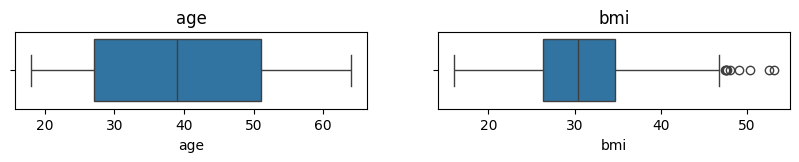

In [151]:
num_cols = ['age', 'bmi']
plt.figure(figsize=(10, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.title(f"{col}")
    sns.boxplot(df[col], orient="h")
plt.show()

In [152]:
Q1 = df.bmi.quantile(.25)
Q3 = df.bmi.quantile(.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
outliers = df[df.bmi > upper].bmi.values
df.bmi.replace(outliers, upper, inplace=True)

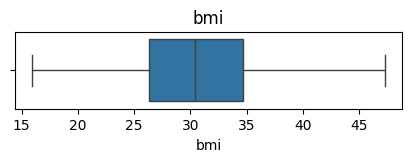

In [153]:
plt.figure(figsize=(5, 1))
plt.title("bmi")
sns.boxplot(df.bmi, orient="h")
plt.show()

# 5. Visualization 

In [154]:
num_cols = ['age', 'bmi']
cat_cols = ['sex', 'children', 'smoker', 'region']

### Check for relation between each feature & the targer

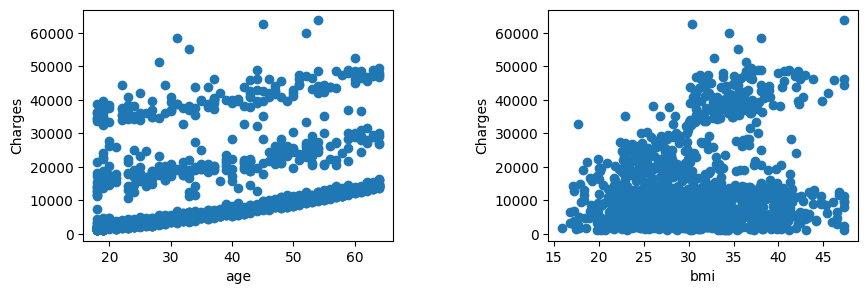

In [155]:
plt.figure(figsize=(10, 3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.xlabel(f"{col}")
    plt.ylabel("Charges")
    plt.scatter(df[col], df.charges)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

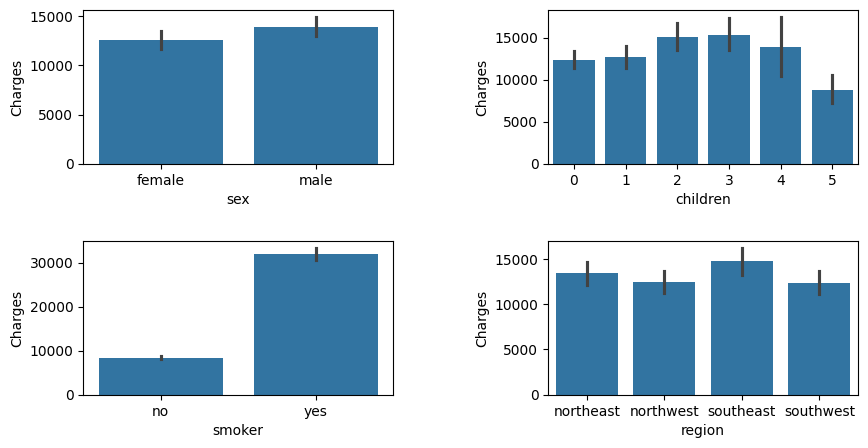

In [156]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    plt.xlabel(f"{col}")
    plt.ylabel("Charges")
    sns.barplot(x=col, y="charges", data=df)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

### Check for Variation

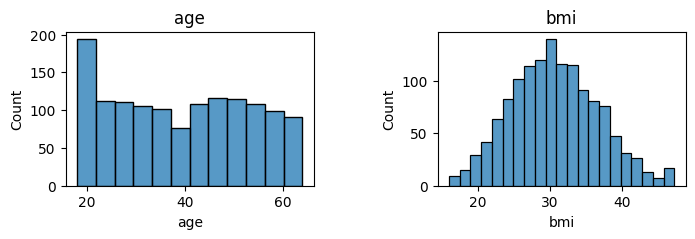

In [157]:
plt.figure(figsize=(8, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.title(f"{col}")
    sns.histplot(x=col, data=df)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

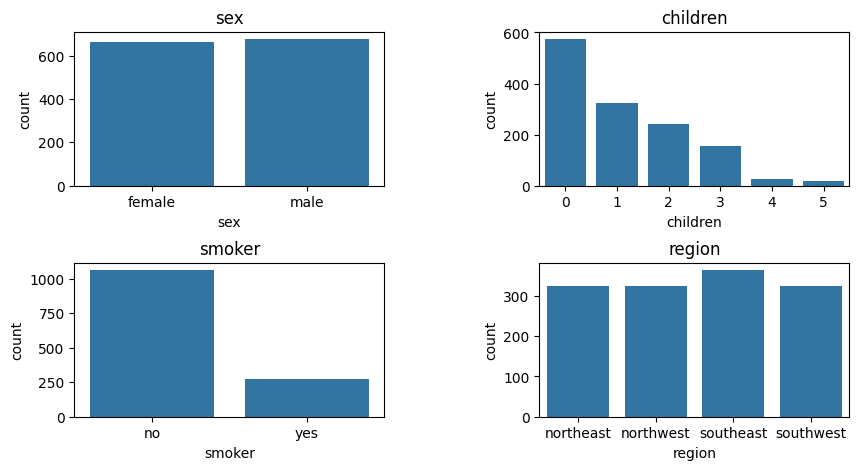

In [158]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    plt.title(f"{col}")
    sns.countplot(x=col, data=df)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

# 6. Duplicates

In [159]:
print(df.duplicated().sum())
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum())

1
0


# 7. Splitting Data 

In [160]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

# 8. Normalization

In [161]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = X.select_dtypes("number").columns
scaler = MinMaxScaler()

In [162]:
x[cols_to_norm] = scaler.fit_transform(X[cols_to_norm])

# 9. Encoding

In [163]:
pd.DataFrame({"Dtype":X.dtypes, "Num_Unique": X.nunique()}).T

,age,sex,bmi,children,region,charges
Dtype,int64,category,float64,category,category,float64
Num_Unique,47,2,540,6,4,1337


- **Ordinal Encoding**

In [164]:
from category_encoders import OrdinalEncoder
cols_to_encode = ['sex', 'smoker']
ordinal_encoder = OrdinalEncoder(cols=cols_to_encode)
x = ordinal_encoder.fit_transform(x)

- **One Hot Encoding**

In [165]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=["region"])
x = encoder.fit_transform(x)

### Machine learning 

In [166]:
x.head(11)

,age,sex,bmi,children,smoker,region_1,region_2,region_3,region_4,charges
0,0.021739,1,0.381104,0,1,1,0,0,0,0.251611
1,0.000000,2,0.568465,1,2,0,1,0,0,0.009636
2,0.217391,2,0.543888,3,2,0,1,0,0,0.053115
3,0.326087,2,0.215289,0,2,0,0,1,0,0.333010
4,0.304348,2,0.412384,0,2,0,0,1,0,0.043816
5,0.282609,1,0.312161,0,2,0,1,0,0,0.042056
6,0.608696,1,0.557932,1,2,0,1,0,0,0.113629
7,0.413043,1,0.375997,3,2,0,0,1,0,0.098320
8,0.413043,2,0.442707,2,2,0,0,0,1,0.084352
9,0.913043,1,0.315353,0,2,0,0,1,0,0.443765


In [167]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   float64 
 1   sex       1337 non-null   int64   
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   category
 4   smoker    1337 non-null   int64   
 5   region_1  1337 non-null   int64   
 6   region_2  1337 non-null   int64   
 7   region_3  1337 non-null   int64   
 8   region_4  1337 non-null   int64   
 9   charges   1337 non-null   float64 
dtypes: category(1), float64(3), int64(6)
memory usage: 106.0 KB


In [168]:
x.describe()

,age,sex,bmi,smoker,region_1,region_2,region_3,region_4,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,0.461351,1.504862,0.468882,1.795064,0.243082,0.272251,0.242334,0.242334,0.194055
std,0.305312,0.500163,0.193399,0.403806,0.429104,0.445285,0.428655,0.428655,0.193306
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,1.000000,0.329716,2.000000,0.000000,0.000000,0.000000,0.000000,0.057854
50%,0.456522,2.000000,0.460900,2.000000,0.000000,0.000000,0.000000,0.000000,0.131915
75%,0.717391,2.000000,0.598149,2.000000,0.000000,1.000000,0.000000,0.000000,0.247984
max,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_1', 'region_2',
       'region_3', 'region_4', 'charges'],
      dtype='object')

## Training a Linear Regression Model


In [171]:
X=x[['age', 'sex', 'bmi', 'children', 'region_1', 'charges']]
y=x['smoker']

## Train Test Split


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [174]:
linearmodel=LinearRegression()

In [175]:
linearmodel.fit(X_train,y_train)

LinearRegression()

In [177]:
print(linearmodel.intercept_)

1.8541113110775052


In [178]:
linearmodel.intercept_

np.float64(1.8541113110775052)

In [180]:
coeff=pd.DataFrame(linearmodel.coef_,X.columns,columns=["coeffiecent"])
coeff

,coeffiecent
age,0.355754
sex,-0.021137
bmi,0.336467
children,0.013395
region_1,-0.000473
charges,-1.919857


## Predictions from our Model


In [181]:
predictions=linearmodel.predict(X_test)

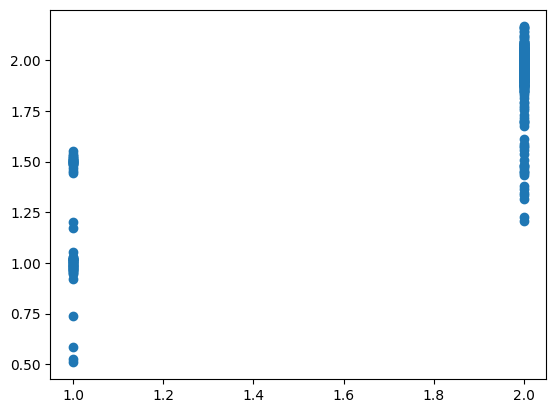

In [182]:
plt.scatter(y_test,predictions)

In [184]:
from sklearn import metrics

In [185]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.11613609575446848
MSE: 0.03969118968628202
RMSE: 0.1992264783764498
